<a href="https://colab.research.google.com/github/ahkhaniki/spark-machine-learning/blob/main/BigData4012_AHK_Spark_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
Course: Big Data (4012)

Author: Amir Hussein Khaniki

URL: https://colab.research.google.com/drive/1Qyg3oEfTtVmx4axa0WYc85jJzSq_ataJ

---

#**Introduction**


Machine learning is a subset of artificial intelligence (AI), which provides systems that automatically recognize and train complex patterns in data and can therefore make intelligent decisions based on the data. Machine learning can be supervised or unsupervised. In supervised machine learning algorithms, the dataset contains features and labels.

Supervised learning algorithms are called classification if the label has a discrete value. One of the classification algorithms is Logistic Regression. This algorithm is a classification algorithm as opposed to regression in its name.

Assumptions of Logistic regression:

* Independent variables show a linear relationship with the log of output 
variables.
* Non-Collinearity between independent variables. That is, independent variables are independent of each other.
* Output variable is binary.

Logistic regression is a popular method to predict a categorical response. It is a special case of Generalized Linear models that predicts the probability of the outcomes. In Spark MLlib logistic regression can be used to predict a binary outcome by using binomial logistic regression, or it can be used to predict a multiclass outcome by using multinomial logistic regression.

MLlib is Spark’s machine learning (ML) library and designed for simplicity, scalability, and easy integration with other tools. Its goal is to make practical machine learning scalable and easy.

PySpark for Machine Learning is fast and uses multiple machines for large-scale data processing. It runs on distributed computing, such as YARN, Mesos, and Standalone clusters. PySpark has two main Abstractions:

RDD - A distributed collection of objects.

Dataframe - Distributed dataset for tabular data.

RDD - Resilient Distributed Datasets are a distributed collection of immutable JVM objects that allows you to perform calculations very quickly, and they are the backbone of Apache spark. As the name suggests, the dataset is distributed; it is split into chunks based on some key and distributed to nodes. Doing this allows calculations to be performed very quickly. RDDs are schema-less data structures.

Dataframe - This is an immutable distributed collection of data organized into named columns, the same as a table in a relational database. People who work with pandas data frame can completely relate to this abstraction.

MLLib is Spark’s machine learning (ML) library that helps make functional machine-learning models scalable and manageable. 

Spark MLLib consists of in-built tools such as.

Machine Learning Algorithms: Common learning algorithms include logistic regression models, regression, decision trees, random forest algorithms, and many other ensemble methods.

Featurization: Feature extraction, feature scaling, feature selection, and dimensionality reduction. 

Pipelines: Tools for constructing, evaluating, and building machine learning pipelines.

Persistence: Saving and loading algorithms, models, and pipelines.

While building a machine learning model, data scientists must perform many tasks, including data cleaning, feature engineering, making inferences from data, building machine learning pipelines, saving models, and finally deploying it. Spark MLlib library provides multiple features, making it a go-to choice for data scientists across top tech companies.

Right now, we are going to learn how to use Apache Spark MLlib to create a machine learning application. The application will do predictive analysis on our dataset. From Spark's built-in machine learning libraries, we use classification through logistic regression.

##Problem Statement


##Dataset

#**Prerequisites**
Before processing the data, we must do some preparations and prerequisites.

##Connecting to Google Drive
The first thing we want to do when we are working on Colab is mounting our Google Drive. This will enable us to access any directory on Google Drive inside the workspace on Colab notebook. 

In [ ]:
# mount Google Drive to access the dataset 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


##Setting up PySpark in Colab
Since Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, our first task is to download Java.

As well as, we can install and set up the Spark environment on Google Colab by manual method (using download) or automated method (using pip).

Therefore, we install following dependencies:


1. Java 8
2. Apache Spark with hadoop
3. FindSpark (used to locate the spark in the system)
4. PySpark (used as an interface for Apache Spark in Python)


**Method 1**

In [ ]:
# install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# install spark
!wget -q https://archive.apache.org/dist/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
# unzip the spark file to the current folder
!tar -xvf spark-3.3.2-bin-hadoop3.tgz

^C
spark-3.3.2-bin-hadoop3/
spark-3.3.2-bin-hadoop3/LICENSE
spark-3.3.2-bin-hadoop3/NOTICE
spark-3.3.2-bin-hadoop3/R/
spark-3.3.2-bin-hadoop3/R/lib/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.2-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/hsearch.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/links.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/nsInfo.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/package.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/vignette.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.3.2-bin-hadoop3/R/lib/SparkR/doc/
spark-3.3.2-bin-hadoop3/R/lib/S

In [ ]:
!ls

drive  sample_data  spark-3.3.2-bin-hadoop3


In [ ]:
! du -sh

1.8G	.


Now, we need to set following Environment Variables.

In [ ]:
# set spark folder to system path environment
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

**Method 2**

In [ ]:
# install libraries related to Spark
!pip install -q findspark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


##Install Other Resources
We install some libraries and tools for some jobs.

In [ ]:
# a librariy for plotting Spark dataframes by making calculations for plots inside Spark in two plot types: Histogram, 2D Histogram
# url: https://github.com/danielfrg/spark-plot
!pip install spark-plot
# a library that plots visualizations with a pyspark dataframes
# url: https://github.com/dvgodoy/handyspark
!pip install -q handyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for spark-plot: filename=spark_plot-0.0.1-py2.py3-none-any.whl size=9073 sha256=4a7ec81acd188a8199a61c46af3469758204e18b1275360d2f526137c7681cde
  Stored in directory: /root/.cache/pip/wheels/ca/a1/45/28d97272dd54140e4bdda0e55042809bbcbef9d96bb0774a4f
Successfully built spark-plot


##Using Libraries
After installing the prerequisites and preparing the processing infrastructure, we need to import the required libraries along with some important classes and modules into the workspace. Based on the limitations defined in the work instructions, we should use the capabilities of the PySpark library. Also, some types of data drawing libraries such as plots and charts are necessary for exploratory data analysis (EDA).

However, wherever a new library is needed, it will be imported in the required place.

In [ ]:
# import necessary and needful libraries

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

import findspark

from pyspark import SparkContext
from pyspark import SQLContext

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression, LinearSVC
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder, StandardScaler #, VectorSlicer
from pyspark.ml.evaluation import *#BinaryClassificationEvaluator, MulticlassClassificationEvaluator
#from pyspark.ml.linalg import Vectors
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from spark_plot import mpl
from handyspark import *

##Initializing a SparkSession
We should create a working session in Spark to process the data at this moment. SparkSession is an entry point to Spark to work with RDD, DataFrame, and Dataset.

In [ ]:
#findspark.init()
#findspark.find()

In [ ]:
#sc = SparkContext()
#spark = SQLContext(sc)

In [ ]:
# building a spark app/session
spark = SparkSession.builder.master("local[*]").appName("MachineLearning").getOrCreate()
# property used to format output tables better
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

# single cluster information
spark

#**Data Exploring**
Let us read in the file and take a look at the variables of the dataset.
Before doing any slice & dice of the dataset or anythingelse, we should first be aware what all columns it has and its data types by exploring the dataset.

## Loading the Dataset

In [ ]:
# load data from csv to a dataframe. 
# header=True means the first row is a header 
# sep=',' means the column are seperated using ','
# inferschema=true infers the input schema automatically while loading the data
#df = spark.read.options(header=True, inferSchema = True, sep=",").csv("/content/drive/My Drive/Academic Projects/University of Isfahan/Big Data/Homeworks/HW5/ML_hw_dataset.csv")
df = spark.read.csv("/content/drive/My Drive/Academic Projects/University of Isfahan/Big Data/Homeworks/HW5/ML_hw_dataset.csv", header=True, inferSchema = True, sep=",")

How big is the dataset?

In [ ]:
# extract number of rows and columns from the Dataframe
print(f'Dimension of the dataset is:') #{(df.count(), len(df.columns))}
print(f'--Rows: {df.count()}')
print(f'--Columns: {len(df.columns)}')

Dimension of the dataset is:
--Rows: 41188
--Columns: 21


After reading the data into PySpark as DataFrame (DF), we can show the first few observations using show() or cache() method.
Each of them displays data that loaded from our dataset into a dataframe. A dataframe is a 2-dimensional labeled data structure with columns of potentially different types.

We can see the names of the dataset columns below.

In [ ]:
# get all column names from dataframe
df.columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

We can review the dataset by looking at the first few rows of data. Cache() are used because accessing data multiple times.

In [ ]:
df.cache().show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar| married|         basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician| married|          unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|          93.2|      

##Descriptive Analysis
The machine learning algorithm cannot be trained by a dataset with missing values or null. So we need to check for missing values and null, if any, correct or remove them using different methods based on the type of them.

First, we need to get a general overview and description of the dataset.

Commonly df.dtypes and printSchema() are the two methods used to view data types of a dataframe in pyspark. We can also retrieve the data type of a specific column name using df.schema["name"].dataType or get all column names by using df.columns.

In [ ]:
# get all column types from dataframe
df.dtypes

[('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('month', 'string'),
 ('day_of_week', 'string'),
 ('duration', 'int'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('emp_var_rate', 'double'),
 ('cons_price_idx', 'double'),
 ('cons_conf_idx', 'double'),
 ('euribor3m', 'double'),
 ('nr_employed', 'double'),
 ('y', 'int')]

We can print out the schema in tree format via printSchema() method, which shows the datatypes as well.

In [ ]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: integer (nullable = true)



Summary statistics for numeric variables


In [ ]:
# get a view of the data agian
df.show(5)

+---+-----------+-------+-----------------+-------+-------+----+--------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job|marital|        education|default|housing|loan| contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+-------+-----------------+-------+-------+----+--------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar|married|         basic.4y|unknown|    yes|  no|cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician|married|          unknown|     no|     no|  no|cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|          93.2|        -42.0|  

As can be seen, we have 21 variables that 'y' is the target or the dependent variable. There are also 10 numeric and 10 non-numeric variables which are factors. We are going to analyze the continuous variables, discrete variables, and the factors separately and then we will incorporate what we found to the models.

Likewise, due to the range of values of 'y', it can be considered as bit or boolean type. A boolean is a data type that can store either a True or False value that is often stored as 1 (true) or 0 (false).

In order to get a comprehensive view, we need to obtain a summary of the central tendency, dispersion and shape of the dataset’s distribution, by analyzing both numeric and object series, as well as DataFrame column sets of mixed data types.

The describe() method is used for calculating some statistical data like percentile, mean and std of the values. 


In [ ]:
df.describe().show()

+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-------------------+
|summary|               age|    job| marital|education|default|housing| loan|  contact|month|day_of_week|          duration|          campaign|             pdays|           previous|poutcome|       emp_var_rate|    cons_price_idx|     cons_conf_idx|         euribor3m|      nr_employed|                  y|
+-------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-------------------+
|  count|             41188|  41188|   41188|    41188|  41188|  41188|41188|  

According to the information obtained, we have two types of variables in the dataset. These are continuous (numerical) variables and discrete (categorical) variables.

Continuous variables are:
1. age
2. duration
3. campaign
4. pdays
5. previous
6. emp_var_rate
7. cons_price_idx
8. cons_conf_idx
9. euribor3m
10. nr_employed

Discrete variables are:
1. job
2. marital
3. education
4. default
5. housing
6. loan
7. contact
8. month
9. day_of_week
10. poutcome
11. y (based on its range)



Next, if we have a few columns with null values, it’s best to replace them with some values. Therefore, we will use the fillna() function to replace the null values. Since Spark dataframes are immutable, we need to store the result in a new dataframe if there are.

Unlike the pandas library, in PySpark we don't have easy and quick access to the isnull() method for counting missing values.

Count of Missing values of dataframe in PySpark is obtained using isnan() method. Each column name is passed to isnan() method which returns the count of missing values of each columns. So number of missing values of each column in dataframe will be shown.

In [ ]:
# get count of nan or missing values in pyspark
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



Count of null values of dataframe in PySpark is obtained using null() method. Each column name is passed to null() method which returns the count of null() values of each columns. So number of null values of each column in dataframe will be shown.

In [ ]:
# get count of null values in pyspark
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



Now, we can count both null and missing values of dataframe by using null() and isnan() methods as following in pyspark. So number of both null values and missing values of each column in dataframe will be displayed.



In [ ]:
# get count of both null and missing values in pyspark
# from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



According to above result, we haven't any null or missing value luckily.

In [ ]:
#df.describe().show().transpose()

##Exploratory Data Analysis
Before building any model, it is essential to understand the dataset. Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.

In other words, EDA is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.

Here, we collect the list of variables by type..

In [ ]:
# get the names of discrete (string) variables
#categorical_vars = [col.name for col in df.schema if col.dataType == StringType() & col.name != "y"]
categorical_vars = [c[0] for c in df.dtypes if (c[1] == "string") & (c[0] != "y")]
categorical_vars
print(f"Discrete variables name:\n {categorical_vars}")

Discrete variables name:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [ ]:
# get the names of continuous (numeric) variables such as int or double type excluding y
#numerical_vars = [col.name for col in df.schema if col.dataType != StringType() & col.name != "y"]
#numerical_vars = [c[0] for c in df.dtypes if ((c[1] == "int") | (c[1] == "double")) & (c[0] != "y")]
numerical_vars = [c[0] for c in df.dtypes if (c[1] != "string") & (c[0] != "y")]
numerical_vars
print(f"Continuous variables name:\n {numerical_vars}")

Continuous variables name:
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


As mentioned earlier, although PySpark has many similarities with pandas, but it lacks some features, such as supporting visualizations like plot. So doing some things might be complicated and hard in pyspark. Also, pandas is not appropriate for real-world big data because that requires the whole data to be in the memory for processing and visualization.

There are some libraries such as HandySpark or SparkPlot that bridge this gap by giving pandas like functionality to your PySpark dataframe without compromising with the drawbacks of pandas.

Since we tend not to use pandas as much as possible, we use the HandySpark for data visualization.

In [ ]:
# pass dataframe to HandySpark
hdf = df.toHandy()
#hdf.show()

We will also use Pandas only for some visualizations.

In [ ]:
# pass Spark dataframe to Pandas dataframe
pdf = df.toPandas()

###Univariate Analysis
The univariate analysis explores each variable in a data set, separately. In this section, we are going to  explore categorical (discrete) and numerical (continuous) variables in the dataset one by one. 

Visualizing 

**Y (The dependent variable)**

+---+-----+-----+
|  y|count|    %|
+---+-----+-----+
|  0|36548|88.73|
|  1| 4640|11.27|
+---+-----+-----+



<Axes: title={'center': 'y'}, xlabel='y', ylabel='count'>

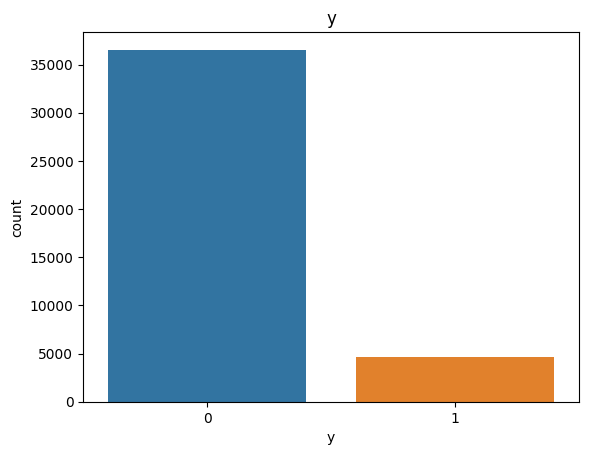

In [ ]:
#df.groupBy('y').count().orderBy('count', ascending=False).show()
#df.groupBy("y").count().sort("y").show()
df.groupBy("y").agg(count("y").alias("count"), round((count("y")/df.count())*100,2).alias('%')).sort("y").show()
hdf.cols["y"].hist()

The chart above shows that almost 12% of individuals subscribe to term deposit.

In [ ]:
df.groupBy("y").mean().show()

+---+------------------+------------------+------------------+-----------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------+
|  y|          avg(age)|     avg(duration)|     avg(campaign)|       avg(pdays)|      avg(previous)|  avg(emp_var_rate)|avg(cons_price_idx)| avg(cons_conf_idx)|    avg(euribor3m)|  avg(nr_employed)|avg(y)|
+---+------------------+------------------+------------------+-----------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------+
|  1| 40.91314655172414| 553.1911637931034|2.0517241379310347|792.0355603448276|0.49267241379310345|-1.2334482758620904|  93.35438599138045|-39.789784482758776| 2.123135129310347|  5095.11599137933|   1.0|
|  0|39.911185290576775|220.84480682937507|2.6330852577432418|984.1138776403634|0.13237386450694977|0.24887545146103576|  93.60375705921629| -40.59309674947548|3.81149116230740

We can observed that the average age of people who buy deposits is higher, and the average pdays is lower for people who bought deposits.
Also, campaigns are lower among people who buy deposits.

It clearly shows that there is a class imbalance in the outcome variable. If we use the same dataset without modifying the sample, it will lead to a poor predictive model.

In [ ]:
#sns.countplot(np.array(df.select("y").collect()))
#plt.title('Deposit Distributions n (0: No || 1: Yes)', fontsize=14)

**Job**

+-------------+-----+-----+
|          job|count|    %|
+-------------+-----+-----+
|       admin.|10422| 25.3|
|  blue-collar| 9254|22.47|
| entrepreneur| 1456| 3.54|
|    housemaid| 1060| 2.57|
|   management| 2924|  7.1|
|      retired| 1720| 4.18|
|self-employed| 1421| 3.45|
|     services| 3969| 9.64|
|      student|  875| 2.12|
|   technician| 6743|16.37|
|   unemployed| 1014| 2.46|
|      unknown|  330|  0.8|
+-------------+-----+-----+



<Axes: title={'center': 'job'}, xlabel='job'>

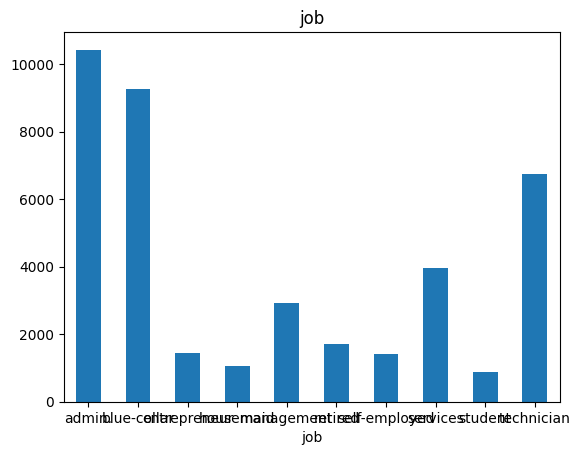

In [ ]:
#df.groupBy("job").count().sort("job").show()
df.groupBy("job").agg(count("job").alias("count"), round((count("job")/df.count())*100,2).alias('%')).sort("job").show()
hdf.cols["job"].hist()

**Marital**

+--------+-----+-----+
| marital|count|    %|
+--------+-----+-----+
|divorced| 4612| 11.2|
| married|24928|60.52|
|  single|11568|28.09|
| unknown|   80| 0.19|
+--------+-----+-----+



<Axes: title={'center': 'marital'}, xlabel='marital'>

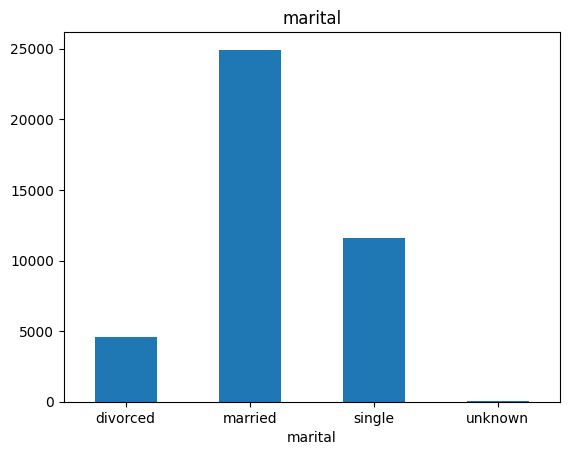

In [ ]:
df.groupBy("marital").agg(count("marital").alias("count"), round((count("marital")/df.count())*100,2).alias('%')).sort("marital").show()
hdf.cols["marital"].hist()

**Education**

+-------------------+-----+-----+
|          education|count|    %|
+-------------------+-----+-----+
|           basic.4y| 4176|10.14|
|           basic.6y| 2292| 5.56|
|           basic.9y| 6045|14.68|
|        high.school| 9515| 23.1|
|         illiterate|   18| 0.04|
|professional.course| 5243|12.73|
|  university.degree|12168|29.54|
|            unknown| 1731|  4.2|
+-------------------+-----+-----+



<Axes: title={'center': 'education'}, xlabel='education'>

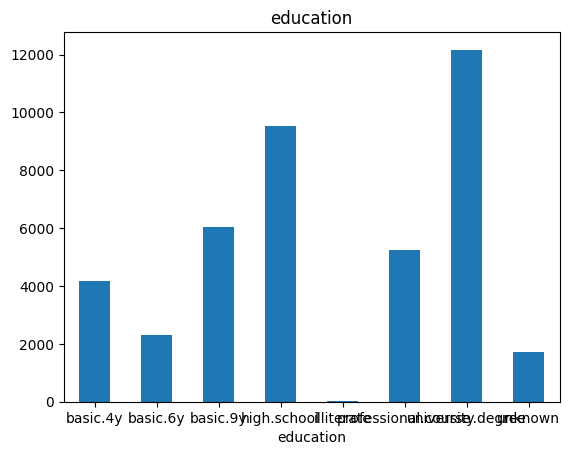

In [ ]:
df.groupBy("education").agg(count("education").alias("count"), round((count("education")/df.count())*100,2).alias('%')).sort("education").show()
hdf.cols["education"].hist()

**Default**

+-------+-----+-----+
|default|count|    %|
+-------+-----+-----+
|     no|32588|79.12|
|unknown| 8597|20.87|
|    yes|    3| 0.01|
+-------+-----+-----+



<Axes: title={'center': 'default'}, xlabel='default'>

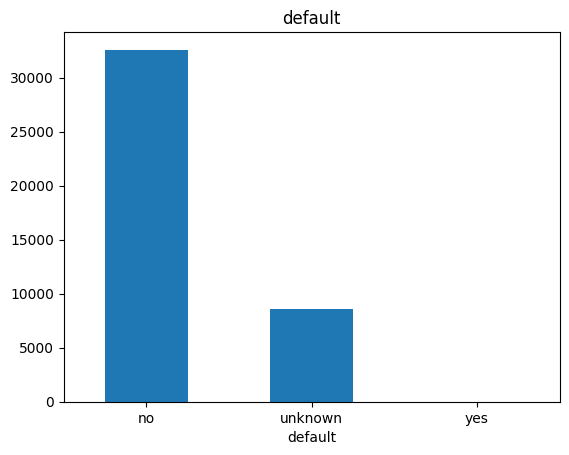

In [ ]:
df.groupBy("default").agg(count("default").alias("count"), round((count("default")/df.count())*100,2).alias('%')).sort("default").show()
hdf.cols["default"].hist()

**Housing**

+-------+-----+-----+
|housing|count|    %|
+-------+-----+-----+
|     no|18622|45.21|
|unknown|  990|  2.4|
|    yes|21576|52.38|
+-------+-----+-----+



<Axes: title={'center': 'housing'}, xlabel='housing'>

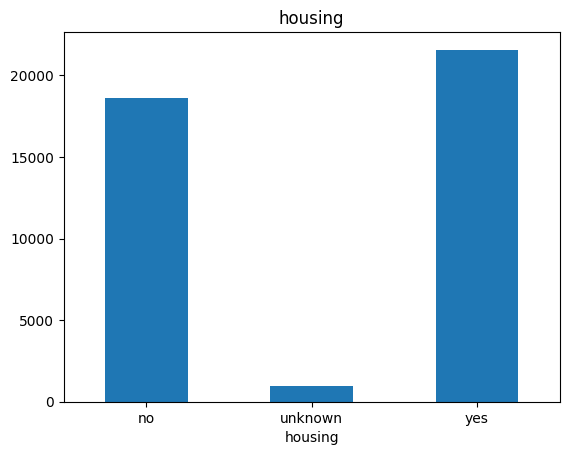

In [ ]:
df.groupBy("housing").agg(count("housing").alias("count"), round((count("housing")/df.count())*100,2).alias('%')).sort("housing").show()
hdf.cols["housing"].hist()

**Loan**

+-------+-----+-----+
|   loan|count|    %|
+-------+-----+-----+
|     no|33950|82.43|
|unknown|  990|  2.4|
|    yes| 6248|15.17|
+-------+-----+-----+



<Axes: title={'center': 'loan'}, xlabel='loan'>

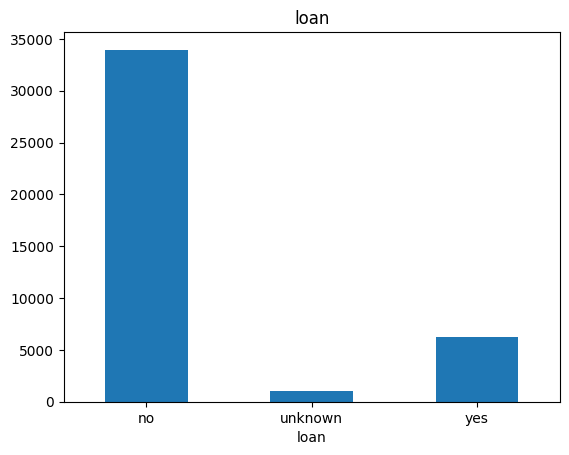

In [ ]:
df.groupBy("loan").agg(count("loan").alias("count"), round((count("loan")/df.count())*100,2).alias('%')).sort("loan").show()
hdf.cols["loan"].hist()
#loan = np.array(df.groupBy("loan").count().sort("loan").collect())
#loan

**Contact**

+---------+-----+-----+
|  contact|count|    %|
+---------+-----+-----+
| cellular|26144|63.47|
|telephone|15044|36.53|
+---------+-----+-----+



<Axes: title={'center': 'contact'}, xlabel='contact'>

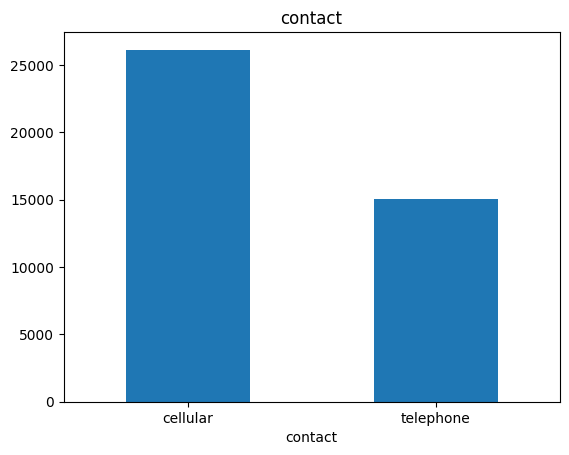

In [ ]:
df.groupBy("contact").agg(count("contact").alias("count"), round((count("contact")/df.count())*100,2).alias('%')).sort("contact").show()
hdf.cols["contact"].hist()

**Month**

+-----+-----+-----+
|month|count|    %|
+-----+-----+-----+
|  apr| 2632| 6.39|
|  aug| 6178| 15.0|
|  dec|  182| 0.44|
|  jul| 7174|17.42|
|  jun| 5318|12.91|
|  mar|  546| 1.33|
|  may|13769|33.43|
|  nov| 4101| 9.96|
|  oct|  718| 1.74|
|  sep|  570| 1.38|
+-----+-----+-----+



<Axes: title={'center': 'month'}, xlabel='month'>

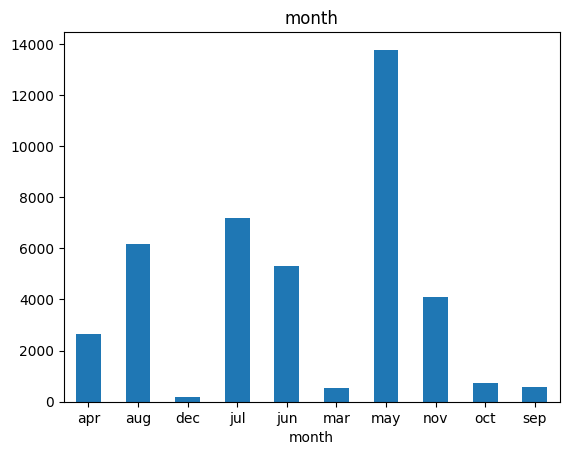

In [ ]:
df.groupBy("month").agg(count("month").alias("count"), round((count("month")/df.count())*100,2).alias('%')).sort("month").show()
hdf.cols["month"].hist()

**Day of Week**

+-----------+-----+-----+
|day_of_week|count|    %|
+-----------+-----+-----+
|        fri| 7827| 19.0|
|        mon| 8514|20.67|
|        thu| 8623|20.94|
|        tue| 8090|19.64|
|        wed| 8134|19.75|
+-----------+-----+-----+



<Axes: title={'center': 'day_of_week'}, xlabel='day_of_week'>

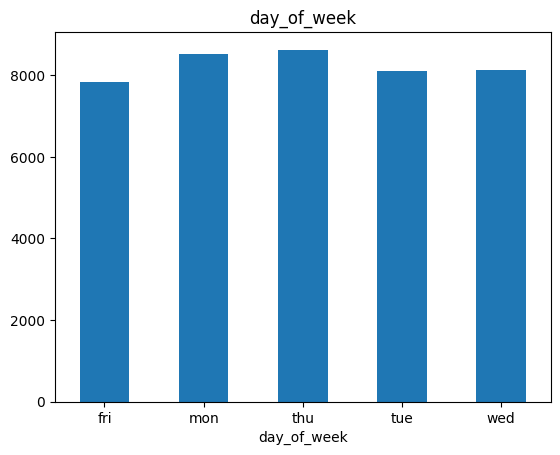

In [ ]:
df.groupBy("day_of_week").agg(count("day_of_week").alias("count"), round((count("day_of_week")/df.count())*100,2).alias('%')).sort("day_of_week").show()
hdf.cols["day_of_week"].hist()

**Poutcome**

+-----------+-----+-----+
|   poutcome|count|    %|
+-----------+-----+-----+
|    failure| 4252|10.32|
|nonexistent|35563|86.34|
|    success| 1373| 3.33|
+-----------+-----+-----+



<Axes: title={'center': 'poutcome'}, xlabel='poutcome'>

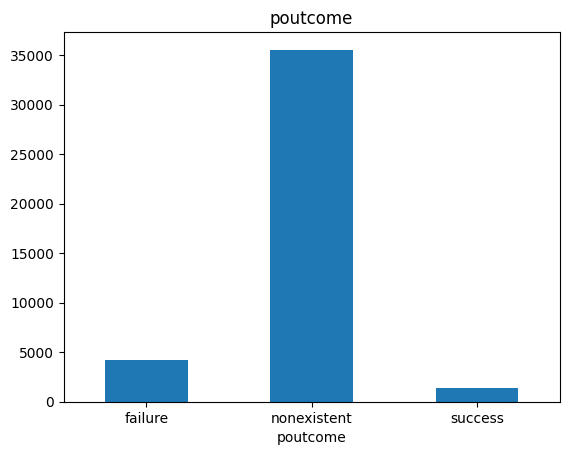

In [ ]:
df.groupBy("poutcome").agg(count("poutcome").alias("count"), round((count("poutcome")/df.count())*100,2).alias('%')).sort("poutcome").show()
hdf.cols["poutcome"].hist()

**Age**

<Axes: title={'center': 'age'}, xlabel='age'>

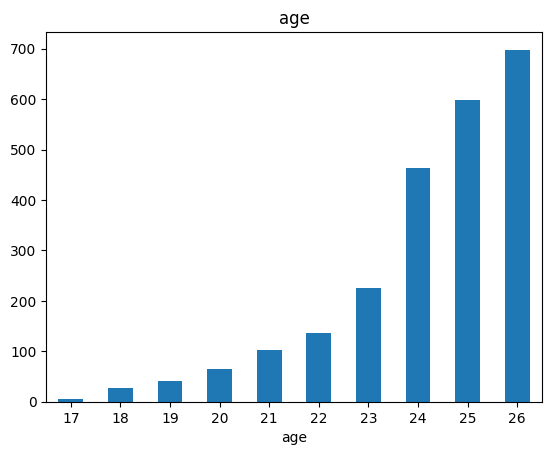

In [ ]:
#df.groupBy("age").count().sort("age").show()
hdf.cols["age"].hist()

Most members are between ages 25 and 40.

**Duration**

<Axes: title={'center': 'duration'}, xlabel='duration'>

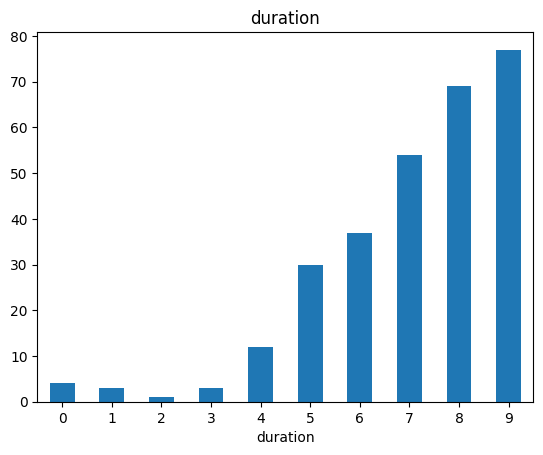

In [ ]:
#df.groupBy("duration").count().sort("duration").show()
hdf.cols["duration"].hist()

**Campaign**

<Axes: title={'center': 'campaign'}, xlabel='campaign'>

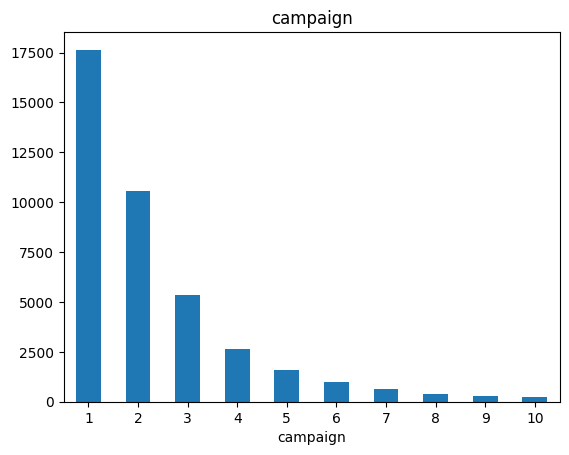

In [ ]:
#df.groupBy("campaign").count().sort("campaign").show()
hdf.cols["campaign"].hist()

**Pdays**

<Axes: title={'center': 'pdays'}, xlabel='pdays'>

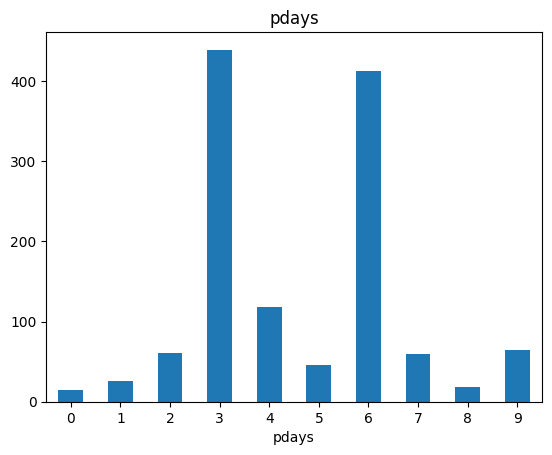

In [ ]:
#df.groupBy("pdays").count().sort("pdays").show()
hdf.cols["pdays"].hist()

**Previous**

<Axes: title={'center': 'previous'}, xlabel='previous'>

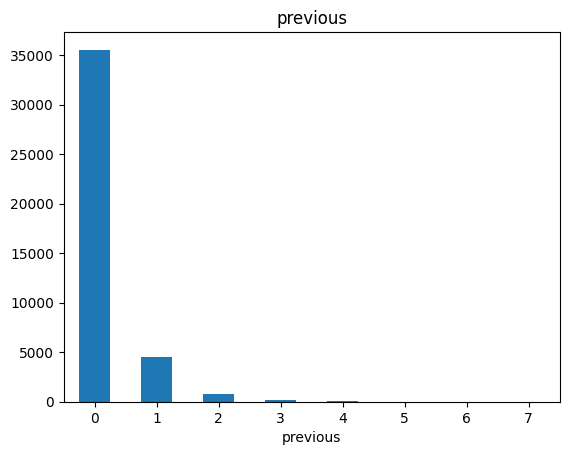

In [ ]:
#df.groupBy("previous").count().sort("previous").show()
hdf.cols["previous"].hist()

In [ ]:
print("Continuous Variables Visualization","\n")
df.hist(column=continous_vars,figsize=(16,16))
plt.show()

###Multivariate Analysis
The multivariate analysis looks into the relationship between two or more variables. In this section, we are going to investigate relationships among variables for each observational or experimental unit at a time.

In the previous step, we observed the unknown value in some discrete variables. We may keep them unknown, because these information is not known during a call is performed. Now we will observe how each factor has its impact on whether the person subscribed or not.



**Y based on type of Job**

+---+-------------+-----+
|  y|          job|count|
+---+-------------+-----+
|  0|      unknown|  293|
|  0|      student|  600|
|  0|   unemployed|  870|
|  0|    housemaid|  954|
|  0|self-employed| 1272|
|  0|      retired| 1286|
|  0| entrepreneur| 1332|
|  0|   management| 2596|
|  0|     services| 3646|
|  0|   technician| 6013|
|  0|  blue-collar| 8616|
|  0|       admin.| 9070|
|  1|      unknown|   37|
|  1|    housemaid|  106|
|  1| entrepreneur|  124|
|  1|   unemployed|  144|
|  1|self-employed|  149|
|  1|      student|  275|
|  1|     services|  323|
|  1|   management|  328|
|  1|      retired|  434|
|  1|  blue-collar|  638|
|  1|   technician|  730|
|  1|       admin.| 1352|
+---+-------------+-----+



<Axes: xlabel='y', ylabel='count'>

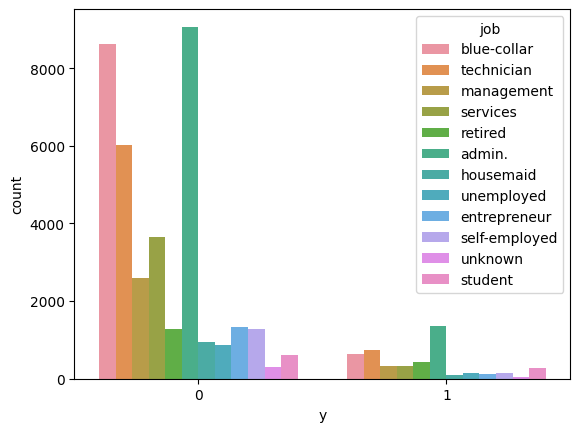

In [ ]:
df.select("y", "job").groupBy("y", "job").count().sort("y", "count").show(50)
#df.select("y", "job").groupBy("y", "job").agg(count("poutcome").alias("count"), round((count("poutcome")/df.count())*100,2).alias('%')).sort("y", "count").show()
sns.countplot(x = "y", hue = "job", data = pdf)

Students and retired have the highest percentage of unwillingness to accept the subscription.

**Y based on type of Marital**

+---+--------+-----+
|  y| marital|count|
+---+--------+-----+
|  0| unknown|   68|
|  0|divorced| 4136|
|  0|  single| 9948|
|  0| married|22396|
|  1| unknown|   12|
|  1|divorced|  476|
|  1|  single| 1620|
|  1| married| 2532|
+---+--------+-----+



<Axes: xlabel='y', ylabel='count'>

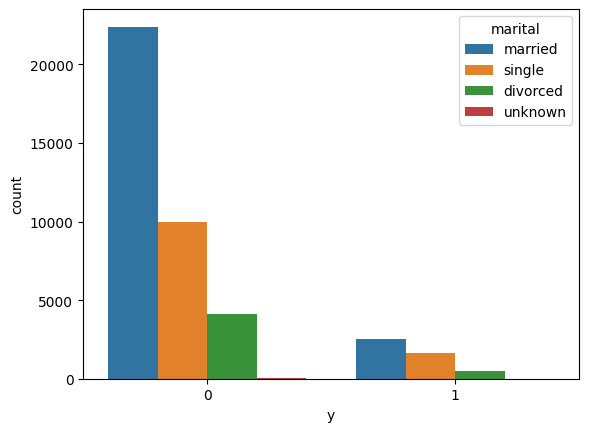

In [ ]:
df.select("y", "marital").groupBy("y", "marital").count().sort("y", "count").show(50)
sns.countplot(x = "y", hue = "marital", data = pdf)

Compared to single or divorced, married has a higher subscription rate. But in general, the rate of non-subscription is higher in all type.

**Y based on type of Education**

+---+-------------------+-----+
|  y|          education|count|
+---+-------------------+-----+
|  0|         illiterate|   14|
|  0|            unknown| 1480|
|  0|           basic.6y| 2104|
|  0|           basic.4y| 3748|
|  0|professional.course| 4648|
|  0|           basic.9y| 5572|
|  0|        high.school| 8484|
|  0|  university.degree|10498|
|  1|         illiterate|    4|
|  1|           basic.6y|  188|
|  1|            unknown|  251|
|  1|           basic.4y|  428|
|  1|           basic.9y|  473|
|  1|professional.course|  595|
|  1|        high.school| 1031|
|  1|  university.degree| 1670|
+---+-------------------+-----+



<Axes: xlabel='y', ylabel='count'>

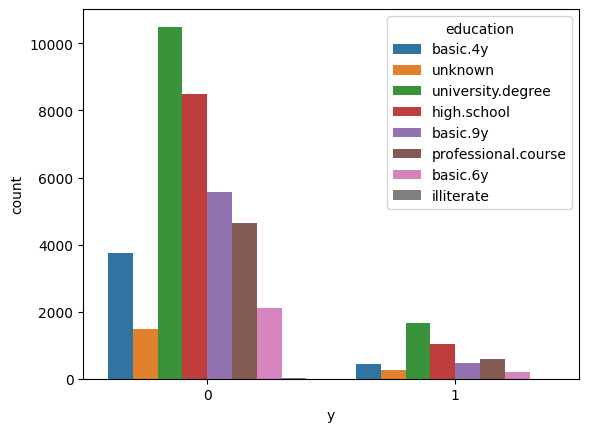

In [ ]:
df.select("y", "education").groupBy("y", "education").count().sort("y", "count").show(50)
sns.countplot(x = "y", hue = "education", data = pdf)

**Y based on type of Housing**

+---+-------+-----+
|  y|housing|count|
+---+-------+-----+
|  0|unknown|  883|
|  0|     no|16596|
|  0|    yes|19069|
|  1|unknown|  107|
|  1|     no| 2026|
|  1|    yes| 2507|
+---+-------+-----+



<Axes: xlabel='y', ylabel='count'>

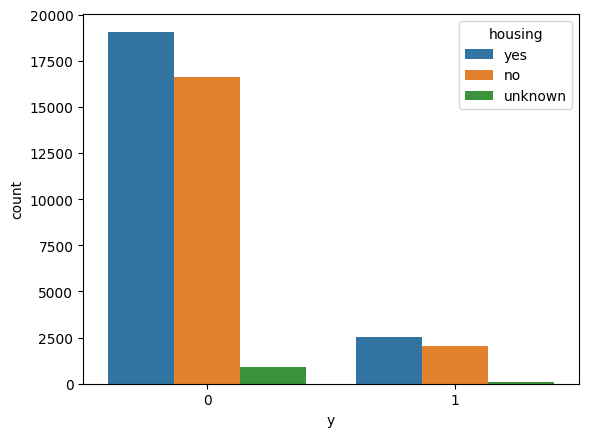

In [ ]:
df.select("y", "housing").groupBy("y", "housing").count().sort("y", "count").show(50)
sns.countplot(x = "y", hue = "housing", data = pdf)

**Y based on type of Loan**

+---+-------+-----+
|  y|   loan|count|
+---+-------+-----+
|  0|unknown|  883|
|  0|    yes| 5565|
|  0|     no|30100|
|  1|unknown|  107|
|  1|    yes|  683|
|  1|     no| 3850|
+---+-------+-----+



<Axes: xlabel='y', ylabel='count'>

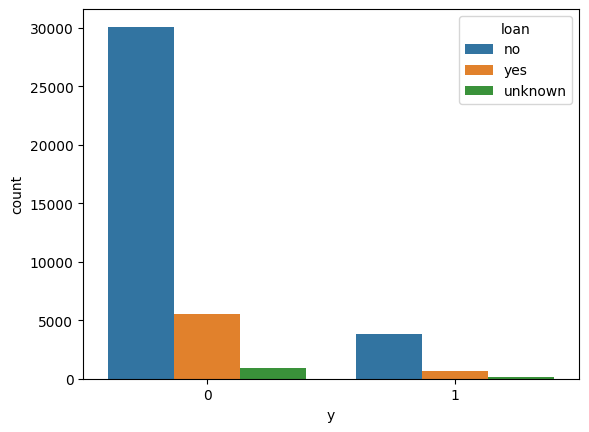

In [ ]:
df.select("y", "loan").groupBy("y", "loan").count().sort("y", "count").show(50)
sns.countplot(x = "y", hue = "loan", data = pdf)

**Y based on type of Contact**

+---+---------+-----+
|  y|  contact|count|
+---+---------+-----+
|  0|telephone|14257|
|  0| cellular|22291|
|  1|telephone|  787|
|  1| cellular| 3853|
+---+---------+-----+



<Axes: xlabel='y', ylabel='count'>

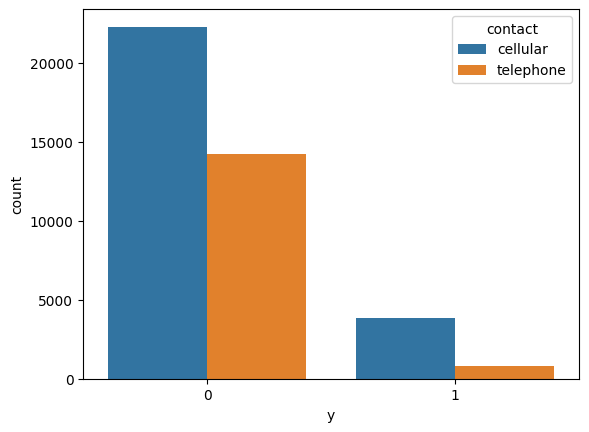

In [ ]:
df.select("y", "contact").groupBy("y", "contact").count().sort("y", "count").show(50)
sns.countplot(x = "y", hue = "contact", data = pdf)

**Y based on type of Month**

+---+-----+-----+
|  y|month|count|
+---+-----+-----+
|  0|  dec|   93|
|  0|  mar|  270|
|  0|  sep|  314|
|  0|  oct|  403|
|  0|  apr| 2093|
|  0|  nov| 3685|
|  0|  jun| 4759|
|  0|  aug| 5523|
|  0|  jul| 6525|
|  0|  may|12883|
|  1|  dec|   89|
|  1|  sep|  256|
|  1|  mar|  276|
|  1|  oct|  315|
|  1|  nov|  416|
|  1|  apr|  539|
|  1|  jun|  559|
|  1|  jul|  649|
|  1|  aug|  655|
|  1|  may|  886|
+---+-----+-----+



<Axes: xlabel='month', ylabel='y'>

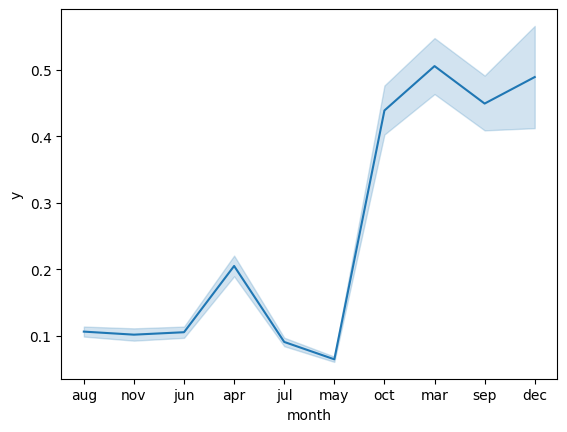

In [ ]:
df.select("y", "month").groupBy("y", "month").count().sort("y", "count").show(50)
#sns.countplot(x = "y", hue = "education", data = pdf)
sns.lineplot(x = "month", y = "y", data = pdf)

Subscriptions are higher during May and after that the number of members who subscribe decline.

**Y based on type of Day**

+---+-----------+-----+
|  y|day_of_week|count|
+---+-----------+-----+
|  0|        fri| 6981|
|  0|        tue| 7137|
|  0|        wed| 7185|
|  0|        thu| 7578|
|  0|        mon| 7667|
|  1|        fri|  846|
|  1|        mon|  847|
|  1|        wed|  949|
|  1|        tue|  953|
|  1|        thu| 1045|
+---+-----------+-----+



<Axes: xlabel='day_of_week', ylabel='y'>

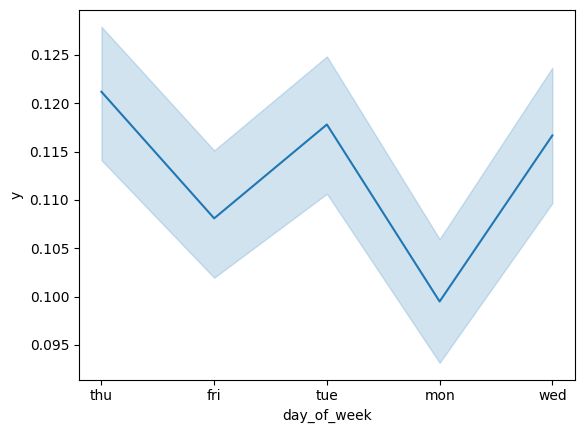

In [ ]:
df.select("y", "day_of_week").groupBy("y", "day_of_week").count().sort("y", "count").show(50)
#sns.countplot(x = "y", hue = "education", data = pdf)
sns.lineplot(x = "day_of_week", y = "y", data = pdf)

Subscriptions is higher on Thursdays and weekends than other days.

**Y based on type of Age**

<Axes: xlabel='y', ylabel='age'>

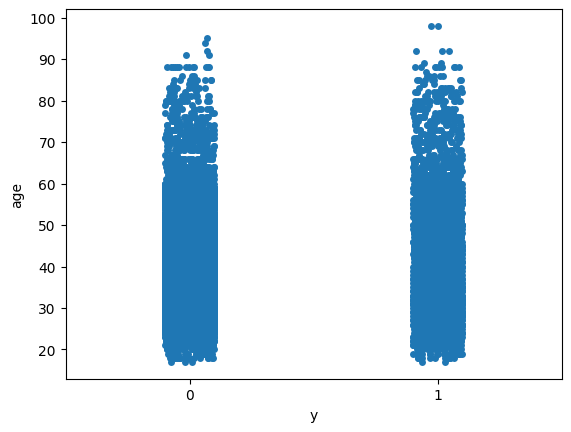

In [ ]:
sns.stripplot(x = "y", y = "age", data = pdf, jitter=True)

<Axes: xlabel='y', ylabel='duration'>

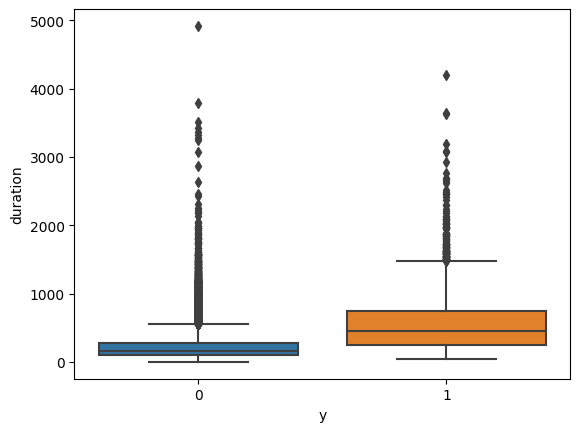

In [ ]:
sns.boxplot(x = "y", y = "duration", data = pdf)

<Axes: xlabel='y', ylabel='campaign'>

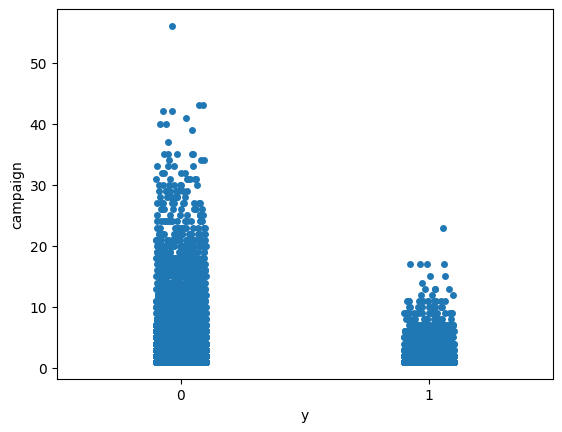

In [ ]:
sns.stripplot(x = "y", y = "campaign", data = pdf)

In the end, we found that the act of purchasing a deposit is most closely related to the job, so the job can be used as a good predictor of outcome variable. Similarly, Education, Day of week, Month, and Poutcome are also good predictors.

#**Model Building**
In this section, we demonstrate using machine learning algorithms such as Logistic Regression and Support Vector Machine (SVM) in PySpark. Before that, we may need to perform some preprocessing operations in order to improve our data status.


##Data Preprocessing
Before we create the model on the most relevant features, we would first need to to clean up or convert type of the variables, such encoding the string variables as binary or numric.

In machine learning, feature vectors are used to represent numeric or symbolic characteristics, called features, of an object in a mathematical, easily analyzable way. They are important for many different areas of machine learning and pattern processing. Accordingly and since, machine learning models can only deal with numerical values, converting any necessary features into feature vectors is crucial.

In the following, we just run most of these tasks as part of a data preprocessing.

Here we review correlations between independent variables at first.



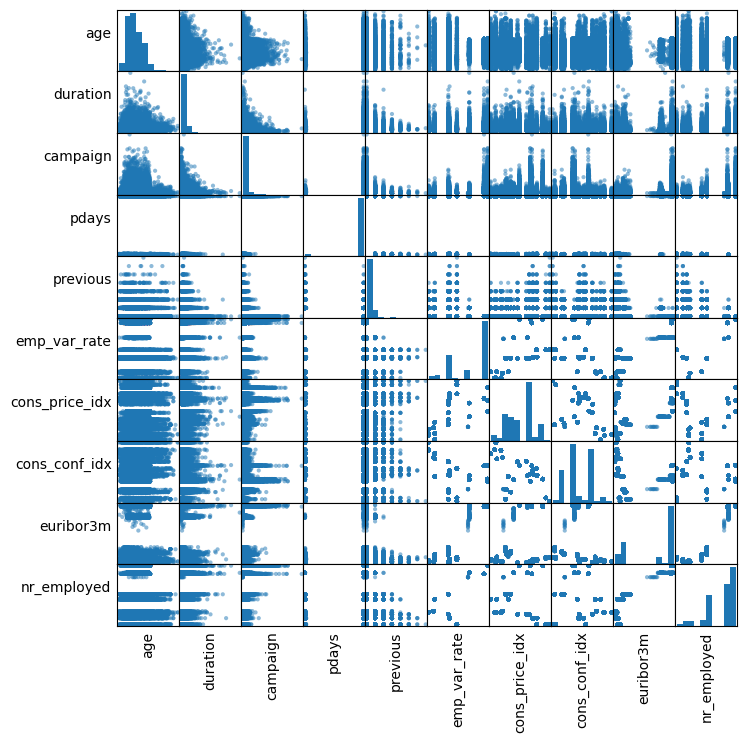

In [ ]:
import pandas as pd
numeric_data = df.select(numerical_vars).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha("right")
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

<Axes: >

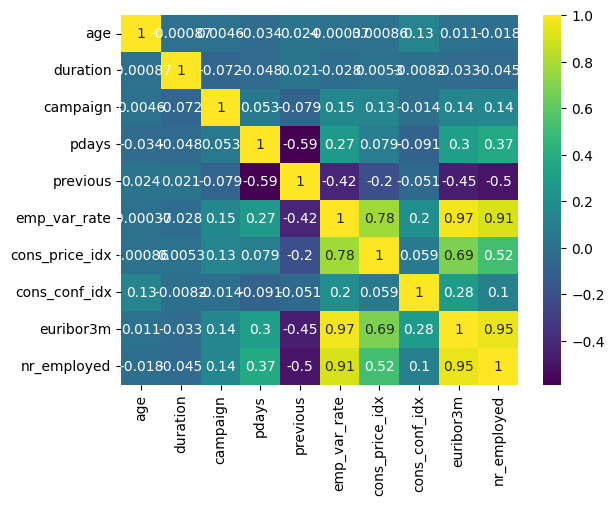

In [ ]:
correlation = df.select(numerical_vars).toPandas().corr()

sns.heatmap(correlation, annot = True, annot_kws = {"size": 10}, cmap="viridis")

In [ ]:
#Heat map
print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

In [ ]:
# Convert pdays column numeric to categorical    
df["pdays_cat"]=[0 if each==999  else 1 for each in df.pdays]
df=df.drop(["pdays"],axis=1)

In our dataset, the classification of Education is too complicated, we can collectively assume to basic.4y, basic.9y, basic.6y as basic.

In [ ]:
processed_df = df

In [ ]:
processed_df = processed_df.withColumn("education", when(col("education") == "basic.4y", "basic")
                                 .when(col("education") == "basic.6y", "basic")
                                 .when(col("education") == "basic.9y", "basic")
                                 .otherwise(col("education")))

In [ ]:
# add id column to have fair data splitting
processed_df = processed_df.withColumn("idx", monotonically_increasing_id())

In [ ]:
processed_df.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|idx|
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+---+
| 44|blue-collar| married|            basic|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|  0|
| 53| technician| married|          unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|     

Also, it may be better to do discrete categorization for some continuous variables.

###**Approach 1**

As mentioned, machine learning uses numerical vectors, as a result, we need to convert discrete values into numric. We can manually value other discrete variables. Hence, here we set the values for the following variables.

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [ ]:
# create an instance for using to convert manually
appr1_df = processed_df

In [ ]:
appr1_df = appr1_df.withColumn("job", when(col("job") == "unknown", -1)
                               .when(col("job") == "unemployed", 0)
                               .when(col("job") == "housemaid", 1)
                               .when(col("job") == "retired", 2)
                               .when(col("job") == "student", 3)
                               .when(col("job") == "blue-collar", 4)
                               .when(col("job") == "services", 5)
                               .when(col("job") == "technician", 6)
                               .when(col("job") == "self-employed", 7)
                               .when(col("job") == "admin.", 8)
                               .when(col("job") == "management", 9)
                               .when(col("job") == "entrepreneur", 10)
                               .otherwise(col("job")).cast(IntegerType()))

In [ ]:
appr1_df = appr1_df.withColumn("marital", when(col("marital") == "unknown", -1)
                               .when(col("marital") == "single", 0)
                               .when(col("marital") == "married", 1)
                               .when(col("marital") == "divorced", 2)
                               .otherwise(col("marital")).cast(IntegerType()))

In [ ]:
appr1_df = appr1_df.withColumn("education", when(col("education") == "unknown", -1)
                               .when(col("education") == "illiterate", 0)
                               .when(col("education") == "basic", 1)
                               .when(col("education") == "high.school", 2)
                               .when(col("education") == "university.degree", 3)
                               .when(col("education") == "professional.course", 4)
                               .otherwise(col("education")).cast(IntegerType()))

In [ ]:
appr1_df = appr1_df.withColumn("contact", when(col("contact") == "cellular", 0)
                               .when(col("contact") == "telephone", 1)
                               .otherwise(col("contact")).cast(IntegerType()))

In [ ]:
appr1_df = appr1_df.withColumn("month", when(col("month") == "jan", 1)
                               .when(col("month") == "feb", 2)
                               .when(col("month") == "mar", 3)
                               .when(col("month") == "apr", 4)
                               .when(col("month") == "may", 5)
                               .when(col("month") == "jun", 6)
                               .when(col("month") == "jul", 7)
                               .when(col("month") == "aug", 8)
                               .when(col("month") == "sep", 9)
                               .when(col("month") == "oct", 10)
                               .when(col("month") == "nov", 11)
                               .when(col("month") == "dec", 12)
                               .otherwise(col("month")).cast(IntegerType()))

In [ ]:
appr1_df = appr1_df.withColumn("day_of_week", when(col("day_of_week") == "sat", 1)
                               .when(col("day_of_week") == "sun", 2)
                               .when(col("day_of_week") == "mon", 3)
                               .when(col("day_of_week") == "tue", 4)
                               .when(col("day_of_week") == "wed", 5)
                               .when(col("day_of_week") == "thu", 6)
                               .when(col("day_of_week") == "fri", 7)
                               .otherwise(col("day_of_week")).cast(IntegerType()))

In [ ]:
appr1_df = appr1_df.withColumn("poutcome", when(col("poutcome") == "failure", -1)
                               .when(col("poutcome") == "nonexistent", 0)
                               .when(col("poutcome") == "success", 1)
                               .otherwise(col("poutcome")).cast(IntegerType()))

In [ ]:
appr1_df = appr1_df.withColumn("default", when(col("default") == "unknown", -1)
                               .when(col("default") == "no", 0)
                               .when(col("default") == "yes", 1)
                               .otherwise(col("default")).cast(IntegerType()))

In [ ]:
appr1_df = appr1_df.withColumn("housing", when(col("housing") == "unknown", -1)
                               .when(col("housing") == "no", 0)
                               .when(col("housing") == "yes", 1)
                               .otherwise(col("housing")).cast(IntegerType()))

In [ ]:
appr1_df = appr1_df.withColumn("loan", when(col("loan") == "unknown", -1)
                               .when(col("loan") == "no", 0)
                               .when(col("loan") == "yes", 1)
                               .otherwise(col("loan")).cast(IntegerType()))

In [ ]:
appr1_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: integer (nullable = true)
 |-- marital: integer (nullable = true)
 |-- education: integer (nullable = true)
 |-- default: integer (nullable = true)
 |-- housing: integer (nullable = true)
 |-- loan: integer (nullable = true)
 |-- contact: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: integer (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: integer (nullable = true)
 |-- idx: long (nullable = false)



In [ ]:
appr1_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in appr1_df.columns]).show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|idx|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+---+



In [ ]:
new_numerical_vars = [c[0] for c in appr1_df.dtypes if (c[1] != "string") & (c[0] != "y") & (c[0] != "idx")]
new_numerical_vars

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [ ]:
appr1_stages = []
# index target label
appr1_label_index = StringIndexer(inputCol = "y", outputCol = "label")#, handleInvalid = "keep")
appr1_df = appr1_label_index.fit(appr1_df).transform(appr1_df)
appr1_stages += [appr1_label_index]

# combine all vectors into a single feature vector  
appr1_assembler = VectorAssembler(inputCols = new_numerical_vars, outputCol = "features")
appr1_df = appr1_assembler.transform(appr1_df)
appr1_stages += [appr1_assembler]

# standardize and scale features to mean 0 and variance 1
#appr1_standard_scaler = StandardScaler(inputCol = "unscaled_features", outputCol = "features", withMean = True, withStd = True)
#appr1_df = appr1_standard_scaler.fit(appr1_df).transform(appr1_df)
#appr1_stages += [appr1_standard_scaler]

In [ ]:
appr1_df.show()

+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+---+-----+--------------------+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|idx|label|            features|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+---+-----+--------------------+
| 44|  4|      1|        1|     -1|      1|   0|      0|    8|          6|     210|       1|  999|       0|       0|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|  0|  0.0|[44.0,4.0,1.0,1.0...|
| 53|  6|      1|       -1|      0|      0|   0|      0|   11|          7|     138|       1|  999|       0|       0|        -0.1|       

Summary statistics for numeric variables in this approach dataset.

In [ ]:
appr1_numeric_features = [c[0] for c in appr1_df.dtypes if (c[1] != "string") & (c[0] != "idx")]
appr1_df.select(appr1_numeric_features).describe().show()

+-------+------------------+------------------+------------------+------------------+--------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+-------------------+-------------------+
|summary|               age|               job|           marital|         education|             default|            housing|               loan|            contact|             month|       day_of_week|          duration|          campaign|             pdays|           previous|          poutcome|       emp_var_rate|    cons_price_idx|     cons_conf_idx|         euribor3m|      nr_employed|                  y|              label|
+-------+------------------+------------------+------------------+------------------+--------------------+-------------------+--

###Approach 2

Another approach is to use Spark methods to convert categorical to numrical values. The following code indexes each categorical column using the StringIndexer, then converts the indexed categories into One-Hot Encoded variables. The resulting output has the binary vectors appended to the end of each row. Also, we use the StringIndexer again to encode our labels to label indices. 

Then, like the previous approach, we use the VectorAssembler agian to combine all the feature (numrical) columns into a single vector column.

A label indexer that maps a string column of labels to an ML column of label indices. If the input column is numeric, we cast it to string and index the string values. 

In [ ]:
# create an instance for using StringIndexer
appr2_df = processed_df

In [ ]:
stages = []
for var in categorical_vars:
    # convert string variables to numerical indices
    #appr2_df = StringIndexer(inputCol = var, outputCol = var + "index").fit(appr2_df).transform(appr2_df)
    string_indexer = StringIndexer(inputCol = var, outputCol = var + "_index")#, handleInvalid = "keep")
    appr2_df = string_indexer.fit(appr2_df).transform(appr2_df)

    # convert categorical variables that converted numerical into binary SparseVectors
    #appr2_df = OneHotEncoder(inputCol = var + "index", outputCol = var + "vec").fit(appr2_df).transform(appr2_df)
    onehot_encoder = OneHotEncoder(inputCol = var + "_index", outputCol = var + "_vec")
    appr2_df = onehot_encoder.fit(appr2_df).transform(appr2_df)

    stages += [string_indexer, onehot_encoder]

# index target label
label_index = StringIndexer(inputCol = "y", outputCol = "label")#, handleInvalid = "keep")
appr2_df = label_index.fit(appr2_df).transform(appr2_df)
stages += [label_index]

# combine all vectors into a single feature vector  
assembler = VectorAssembler(inputCols = numerical_vars + [var + "_vec" for var in categorical_vars], outputCol = "features")
appr2_df = assembler.transform(appr2_df)
stages += [assembler]

# standardize and scale features to mean 0 and variance 1
#standard_scaler = StandardScaler(inputCol = "unscaled_features", outputCol = "features", withMean = True, withStd = True)
#appr2_df = standard_scaler.fit(appr2_df).transform(appr2_df)
#stages += [standard_scaler]

In [ ]:
appr2_df.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+---+---------+--------------+-------------+-------------+---------------+-------------+-------------+-------------+-------------+-------------+----------+-------------+-------------+-------------+-----------+--------------+-----------------+---------------+--------------+-------------+-----+--------------------+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|idx|job_index|       job_vec|marital_index|  marital_vec|education_index|education_vec|default_index|  default_vec|housing_index|  housing_vec|loan_index|     loan_vec|contact_index|  contact_vec|month_index|     month_vec|day_of_week_index|day_of_week_vec|poutcome_index| p

Summary statistics for numeric variables in this approach dataset.



In [ ]:
numeric_features = [c[0] for c in appr2_df.dtypes if (c[1] != "string") & (c[0] != "idx")]
appr2_df.select(numeric_features).describe().show()

+-------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-----------------+-------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+-------------------+
|summary|               age|          duration|          campaign|             pdays|           previous|       emp_var_rate|    cons_price_idx|     cons_conf_idx|         euribor3m|      nr_employed|                  y|         job_index|     marital_index|   education_index|      default_index|     housing_index|         loan_index|      contact_index|       month_index| day_of_week_index|     poutcome_index|              label|
+-------+------------------+------------------+------------------+------------------+-------------------+-------------------+-----

##Modeling

According to the agenda, we should use Logistic Regression for classification modeling. Here we define the initial model to be used in the next steps. As mentioned earlier, we tend to review the results from several approaches.

In order to train and test the model the data set need to be split into a training data set and a test data set. For this purpose, 70% of the data is used to train the model, and 30% will be used for testing.

In [ ]:
# split data into training and test sets randomly and set seed for reproducibility
appr1_train_set, appr1_test_set = appr1_df.randomSplit([0.7, 0.3], seed = 24)

train_idx = appr1_train_set.rdd.map(lambda x: x["idx"]).collect()
test_idx = appr1_test_set.rdd.map(lambda x: x["idx"]).collect()

#print(len(train_idx))
#print(len(test_idx))

# generate approach 2's sets based on approach 1's sets
appr2_train_set = appr2_df.where((appr2_df["idx"]).isin(train_idx))
appr2_test_set = appr2_df.where((appr2_df["idx"]).isin(test_idx))

print(f"Dataset stats:\n-- Main dataset: {appr1_df.count()}")
print(f"-- Train set 1: {appr1_train_set.count()}\n-- Test set 1: {appr1_test_set.count()}")
print(f"-- Train set 2: {appr2_train_set.count()}\n-- Test set 2: {appr2_test_set.count()}")

Dataset stats:
-- Main dataset: 41188
-- Train set 1: 28804
-- Test set 1: 12384
-- Train set 2: 28804
-- Test set 2: 12384


In [ ]:
appr1_train_set.groupBy("y").agg(count("y").alias("count"), round((count("y")/df.count())*100,2).alias('%')).sort("y").show()

+---+-----+-----+
|  y|count|    %|
+---+-----+-----+
|  0|25561|62.06|
|  1| 3243| 7.87|
+---+-----+-----+



In [ ]:
appr1_test_set.groupBy("label").agg(count("label").alias("count"), round((count("label")/df.count())*100,2).alias('%')).sort("label").show()

+-----+-----+-----+
|label|count|    %|
+-----+-----+-----+
|  0.0|10987|26.68|
|  1.0| 1397| 3.39|
+-----+-----+-----+



In [ ]:
appr2_train_set.groupBy("y").agg(count("y").alias("count"), round((count("y")/df.count())*100,2).alias('%')).sort("y").show()

+---+-----+-----+
|  y|count|    %|
+---+-----+-----+
|  0|25561|62.06|
|  1| 3243| 7.87|
+---+-----+-----+



In [ ]:
appr2_test_set.groupBy("y").agg(count("y").alias("count"), round((count("y")/df.count())*100,2).alias('%')).sort("y").show()

+---+-----+-----+
|  y|count|    %|
+---+-----+-----+
|  0|10987|26.68|
|  1| 1397| 3.39|
+---+-----+-----+



###Logistic Regression

The parameters in the Logistic Regression model also include maxIter, regParam and elasticNetParam. The model could be used to perform Elastic-Net Regularization with Logistic Regression, LASSO or ridge Logistic Regression. elasticNetParam corresponds to α and regParam corresponds to λ. By default, LogisticRegression() uses the argument standardization = TRUE to center and scale the data.

In [ ]:
# create initial Logistic Regression model
#logistic_regression = LogisticRegression(featuresCol="features", labelCol="label", maxIter=100, regParam=0.001, elasticNetParam=1, standardization=True)
lr = LogisticRegression(featuresCol="features", labelCol="label", regParam = 1.0, maxIter=100, standardization = True)
appr1_lr = appr2_lr = lr

In [ ]:
# train and fit the train set to the model
appr1_lr_model = appr2_lr.fit(appr1_train_set)
appr2_lr_model = appr2_lr.fit(appr2_train_set)

# train logistic regression model with training data
#appr1_lr_predict_train = appr1_lr_model.transform(appr1_test_set)
#appr2_lr_predict_train = appr2_lr_model.transform(appr2_test_set)

Make predictions on the test set using the transform() method. This will add new columns rawPrediction, probability and prediction. LogisticRegression.transform() will only use the 'features' column.

In [ ]:
# run model with test data set to get predictions
appr1_lr_predict_test = appr1_lr_model.transform(appr1_test_set)

appr1_lr_predict_test.select("label", "rawPrediction", "prediction", "probability").show()

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  1.0|[1.05766265734672...|       0.0|[0.74224362277115...|
|  1.0|[1.14288277484816...|       0.0|[0.75820852669448...|
|  1.0|[1.15006007954116...|       0.0|[0.75952189055157...|
|  0.0|[1.78441263439014...|       0.0|[0.85624088210593...|
|  0.0|[1.77518579039474...|       0.0|[0.85510139001874...|
|  0.0|[1.50167767430670...|       0.0|[0.81782456206317...|
|  1.0|[1.49478926332797...|       0.0|[0.81679602689214...|
|  0.0|[1.59520824848765...|       0.0|[0.83134760588004...|
|  0.0|[1.96265889593806...|       0.0|[0.87682041799006...|
|  0.0|[1.94588683022238...|       0.0|[0.87499744948034...|
|  1.0|[1.52630846126809...|       0.0|[0.82146555585920...|
|  1.0|[1.91312051232006...|       0.0|[0.87136931546342...|
|  1.0|[1.85434190836706...|       0.0|[0.86463608725344...|
|  0.0|[1.80612549813052

In [ ]:
appr2_lr_predict_test = appr2_lr_model.transform(appr2_test_set)

appr2_lr_predict_test.select("label", "rawPrediction", "prediction", "probability").show()

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  1.0|[1.21429836726371...|       0.0|[0.77105861182936...|
|  0.0|[2.37886392152201...|       0.0|[0.91520130721245...|
|  0.0|[2.38161145807581...|       0.0|[0.91541429457860...|
|  0.0|[1.45548188576573...|       0.0|[0.81084066814485...|
|  0.0|[2.65864366306932...|       0.0|[0.93454174362000...|
|  0.0|[2.22050781129722...|       0.0|[0.90207606229204...|
|  0.0|[2.39111947035499...|       0.0|[0.91614760719740...|
|  0.0|[2.60343406526130...|       0.0|[0.93108226351392...|
|  0.0|[2.46031475374414...|       0.0|[0.92131248417715...|
|  0.0|[2.52710726277270...|       0.0|[0.92602042587183...|
|  1.0|[1.67141071713994...|       0.0|[0.84176381575021...|
|  0.0|[1.18379966976898...|       0.0|[0.76563030659381...|
|  0.0|[2.38216577668260...|       0.0|[0.91545720612019...|
|  0.0|[2.34385785338948

Now we want to create a model with Pipeline. A Pipeline is an ordered list of transformers and estimators. In this step, we define the pipeline and then apply it to the test dataset. Similar to what we saw with StringIndexer, a Pipeline is an estimator. The pipeline.fit() method returns a PipelineModel, which is a transformer.

###A3

In [ ]:
# create an instance for using Pipeline
df3 = df

 Here we define the pipeline based on the stages created in previous steps.

 VectorAssembler and StringIndexer are transformers and LogisticRegression is the estimator.

In [ ]:
# build pipeline

pipeline = Pipeline(stages = stages)
#pipeline = Pipeline(stages=[string_indexer, onehot_encoder, label_index, assembler,logistic_regression2 ])

pipeline_model = pipeline.fit(df3)

# test model with test data
pipeline_prediction = pipeline_model.transform(df3)
pipeline_prediction.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+---------+--------------+-------------+-------------+---------------+-------------+-------------+-------------+-------------+-------------+----------+-------------+-------------+-------------+-----------+--------------+-----------------+---------------+--------------+-------------+-----+--------------------+--------------------+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|job_index|       job_vec|marital_index|  marital_vec|education_index|education_vec|default_index|  default_vec|housing_index|  housing_vec|loan_index|     loan_vec|contact_index|  contact_vec|month_index|     month_vec|day_of_week_index|day_of_week_vec|pout

In [ ]:
pipeline_train_set, pipeline_test_set = pipeline_prediction.randomSplit([0.7, 0.3], seed=1)

print(f"Training Dataset Count: {pipeline_train_set.count()}")
print(f"Test Dataset Count: {pipeline_test_set.count()}")

Training Dataset Count: 28849
Test Dataset Count: 12339


In [ ]:
logistic_regression2 = LogisticRegression(featuresCol="features", labelCol="label", regParam = 1.0, maxIter=10, standardization=True)

lr_model2 = logistic_regression2.fit(pipeline_train_set)

predict_train2 = lr_model2.transform(pipeline_train_set)
predict_test2 = lr_model2.transform(pipeline_test_set)

predict_test2.select("label", "rawPrediction", "prediction", "probability").show()

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[2.51221226864239...|       0.0|[0.80782730467877...|
|  1.0|[1.96720791283171...|       0.0|[0.59025338768762...|
|  1.0|[2.55615575627355...|       0.0|[0.82441935781958...|
|  1.0|[2.08155864939155...|       0.0|[0.64766729935083...|
|  0.0|[2.92824722262333...|       0.0|[0.90550141830046...|
|  0.0|[2.02729614885172...|       0.0|[0.62093636650929...|
|  0.0|[2.42741596029975...|       0.0|[0.78107615039382...|
|  0.0|[2.52747508159218...|       0.0|[0.81198180501732...|
|  1.0|[1.64046732747596...|       1.0|[0.42999825183963...|
|  1.0|[2.41587636991747...|       0.0|[0.77675323129306...|
|  1.0|[1.69378622235071...|       1.0|[0.45799879345346...|
|  0.0|[2.00017481554448...|       0.0|[0.60721375218667...|
|  1.0|[2.54248275754889...|       0.0|[0.81773467245528...|
|  0.0|[2.53736386211103

###Support Vector Machine (SVM)

We'll define the linear SVC model by using the LinearSVC class and fit model on train data. LinearSVC is an SVM model for linearly separable problems. Here, we'll set 100 into the iteration number parameter. We can use trasnform() method to predict test data.

In [ ]:
# create initial SVM model
lsvc = LinearSVC(featuresCol="features", labelCol="label", regParam = 1.0, maxIter=100, standardization = True)

appr1_lsvc = appr2_lsvc = lsvc

In [ ]:
# train and fit the train set to the model
appr1_lsvc_model = appr1_lsvc.fit(appr1_train_set)
appr2_lsvc_model = appr2_lsvc.fit(appr2_train_set)

# train SVM model with training data
#appr1_lsvc_predict_train = appr1_lsvc_model.transform(appr1_test_set)
#appr2_lsvc_predict_train = appr2_lsvc_model.transform(appr2_test_set)

In [ ]:
# trasnform model with test data set to get predictions
appr1_lsvc_predict_test = appr1_lsvc_model.transform(appr1_test_set)

appr1_lsvc_predict_test.select("features", "label", "rawPrediction", "prediction").show()

In [ ]:
# trasnform model with test data set to get predictions
appr2_lsvc_predict_test = appr2_lsvc_model.transform(appr1_test_set)

appr2_lsvc_predict_test.select("features", "label", "rawPrediction", "prediction").show()

After predicting test data, we'll check the prediction accuracy. Here, we can use MulticlassClassificationEvaluator. Confusion matrix can be created by using confusion_matrix function of sklearn.metrics module.


In [ ]:
evaluator=MulticlassClassificationEvaluator(metricName="accuracy")
acc = evaluator.evaluate(pred)
 
print("Prediction Accuracy: ", acc)

y_pred=pred.select("prediction").collect()
y_orig=pred.select("label").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm) 

Prediction Accuracy:  0.9365079365079365
Confusion Matrix:
[[24  2]
 [ 2 35]] 

In [ ]:
#@title Default title text


##Evaluation

###Logistic Regression

After performing Logistic Regression on our dataset, we are going to review the results of the built models by different metrics.

Summarize the model over the training set, we can also get accuracy, coefficients, areaUnderROC, and some more. We are going to extract the summary from the returned models instance trained.

In [ ]:
appr1_lr_model_summary = appr1_lr_model.summary
appr2_lr_model_summary = appr2_lr_model.summary

In [ ]:
accuracy = model_summary.accuracy
false_positive_rate = model_summary.weightedFalsePositiveRate
true_positive_rate = model_summary.weightedTruePositiveRate
f_measure = model_summary.weightedFMeasure()
precision = model_summary.weightedPrecision
recall = model_summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, false_positive_rate, true_positive_rate, f_measure, precision, recall))

NameError: ignored

In [ ]:
print("Summary of Logistic Regression model (Approach 1):")
print("-- Accuracy: %s\n-- FPR: %s\n-- TPR: %s\n-- F-measure: %s\n-- Precision: %s\n-- Recall: %s"
      % (appr1_lr_model_summary.accuracy, 
         appr1_lr_model_summary.weightedFalsePositiveRate, 
         appr1_lr_model_summary.weightedTruePositiveRate, 
         appr1_lr_model_summary.weightedFMeasure(), 
         appr1_lr_model_summary.weightedPrecision, 
         appr1_lr_model_summary.weightedRecall))

Summary of Logistic Regression model (Approach 1):
-- Accuracy: 0.8873767532287182
-- FPR: 0.8874158753287926
-- TPR: 0.8873767532287182
-- F-measure: 0.8344579938665023
-- Precision: 0.7874956493864967
-- Recall: 0.8873767532287182


In [ ]:
print("Summary of Logistic Regression model (Approach 2):")
print("-- Accuracy: %s\n-- FPR: %s\n-- TPR: %s\n-- F-measure: %s\n-- Precision: %s\n-- Recall: %s"
      % (appr2_lr_model_summary.accuracy, 
         appr2_lr_model_summary.weightedFalsePositiveRate, 
         appr2_lr_model_summary.weightedTruePositiveRate, 
         appr2_lr_model_summary.weightedFMeasure(), 
         appr2_lr_model_summary.weightedPrecision, 
         appr2_lr_model_summary.weightedRecall))

Summary of Logistic Regression model (Approach 2):
-- Accuracy: 0.8873767532287182
-- FPR: 0.8874158753287926
-- TPR: 0.8873767532287182
-- F-measure: 0.8344579938665023
-- Precision: 0.7874956493864967
-- Recall: 0.8873767532287182


In [ ]:
# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(model_summary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(model_summary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(model_summary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(model_summary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(model_summary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

False positive rate by label:
label 0: 0.955439459127228
label 1: 0.0015237351045126002
True positive rate by label:
label 0: 0.9984762648954874
label 1: 0.044560540872771975
Precision by label:
label 0: 0.8915402058259201
label 1: 0.7880434782608695
Recall by label:
label 0: 0.9984762648954874
label 1: 0.044560540872771975
F-measure by label:
label 0: 0.9419830446000738
label 1: 0.08435136707388018


In [ ]:
# obtain the objective per iteration
objectiveHistory = model_summary.objectiveHistory
print("Objective History:")
for objective in objectiveHistory:
    print(f"-- {objective}")

Objective History:
-- 0.6271986418926495
-- 0.5255423336965225
-- 0.475632169482759
-- 0.3980793154466885
-- 0.3646014333149574
-- 0.3473364267976348
-- 0.33432127215658036
-- 0.3185144061520422
-- 0.3072814989468621
-- 0.30521033241945517
-- 0.30451055977952757


In [ ]:
# coefficients and intercept for model
print(f"Coefficients:\n{lr_model.coefficientMatrix}")

Coefficients:
DenseMatrix([[-4.98565316e-03, -1.01432099e-01,  9.55513305e-03,
               4.28137219e-02, -2.32920587e-02,  4.27113153e-02,
               1.19618149e-02, -1.32760229e-02,  4.41180396e-02,
               5.46534080e-02, -4.15117817e-03,  1.17915393e-02,
              -2.27968296e-05,  3.66338627e-03,  4.58086735e-04,
              -1.48244895e-02,  3.43958951e-03,  1.05509431e-03,
               1.06087602e-04, -1.47630757e-03, -1.39860466e-02,
              -4.22003463e-04,  6.02186894e-03, -8.17383388e-03,
               2.40028867e-03, -9.44845611e-04, -7.31888995e-03,
               2.30964589e-03,  8.07386362e-03, -1.86852475e-03,
               1.07155714e-03,  2.70012894e-03, -3.76719129e-03,
              -1.53079715e-03, -1.29194256e-02,  1.29098279e-02,
               5.55691763e-04, -1.28750350e-03,  1.19381683e-03,
               3.07263917e-04, -1.15684105e-03,  1.09587189e-03,
               3.07263917e-04, -1.88155764e-02,  1.88155764e-02,
           

In [ ]:
print(f"Intercept:\n{lr_model.interceptVector}")

Intercept:
[2.866802721436717,0.715815709464173,-3.5826184309008897]


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator#, MulticlassClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print(f"Area Under ROC: {evaluator.evaluate(appr1_lr_predict_test)}")

Area Under ROC: 0.879738558727471


In [ ]:
# get the receiver-operating characteristic as a dataframe and areaUnderROC.
#model_summary.roc.show()
#print("areaUnderROC: " + str(model_summary.areaUnderROC))

We can obtain the coefficients by using LogisticRegressionModel’s attributes.

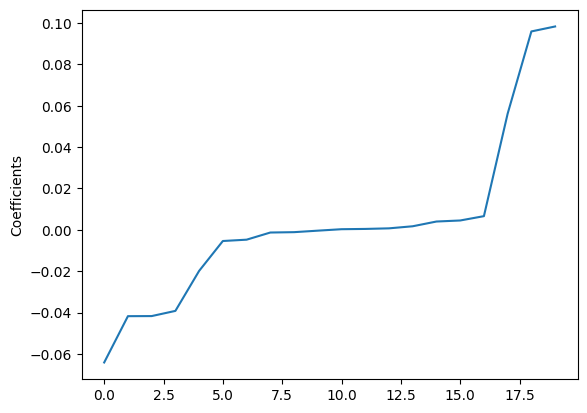

In [ ]:
coeff = np.sort(appr1_lr_model.coefficients)
plt.plot(coeff)
plt.ylabel("Coefficients")
plt.show()

ROC Curve.

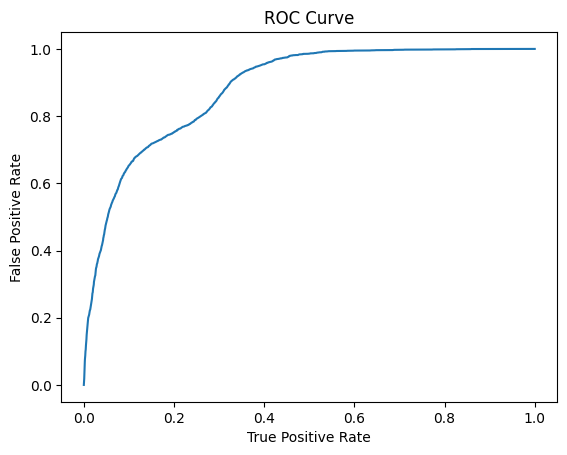

Training Dataset AUC: 0.8828055993653496


In [ ]:
roc = appr1_lr_model_summary.roc.toPandas()
plt.plot(roc["FPR"],roc["TPR"])
plt.ylabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print(f"Training Dataset AUC: {appr1_lr_model_summary.areaUnderROC}")

Precision and recall.

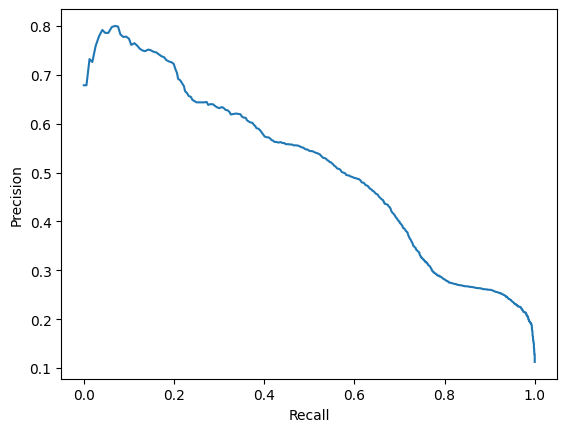

In [ ]:
pr = appr1_lr_model_summary.pr.toPandas()
plt.plot(pr["recall"],pr["precision"])
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.show()

###Support Vector Machine (SVM)

In [ ]:
appr1_lsvc_model_summary = appr1_lsvc_model.summary
appr2_lsvc_model_summary = appr2_lsvc_model.summary
appr1_lsvc_model.coefficients

DenseVector([0.0001, -0.0, -0.0019, 0.0016, 0.0064, -0.0011, 0.0, -0.0138, 0.0002, 0.0005, 0.0001, -0.0003, -0.0003, 0.0544, 0.0785, -0.0025, 0.0124, 0.001, -0.0031, -0.0001])

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
eval = BinaryClassificationEvaluator()
print("The accuracy is: " + str(eval.evaluate(appr1_lsvc_predict_test)))
print("Area under the precision-recall curve: " + eval.areaUnderPR)
print("Area under the receiver operating characteristic (ROC) curve: " + eval.areaUnderROC)

The accuracy is: 0.9176618179394556


AttributeError: ignored

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import confusion_matrix

evaluator=MulticlassClassificationEvaluator(metricName="accuracy")
acc = evaluator.evaluate(appr1_lsvc_model_summary)
print("Prediction Accuracy: ", acc)


y_pred=appr1_lsvc_model.select("prediction").collect()
y_orig=appr1_lsvc_model.select("label").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

AttributeError: ignored

In [ ]:
print("Summary of SVM model (Approach 1):")
print("-- Accuracy: %s\n-- FPR: %s\n-- TPR: %s\n-- F-measure: %s\n-- Precision: %s\n-- Recall: %s"
      % (appr1_lsvc_model_summary.accuracy, 
         appr1_lsvc_model_summary.weightedFalsePositiveRate, 
         appr1_lsvc_model_summary.weightedTruePositiveRate, 
         appr1_lsvc_model_summary.weightedFMeasure(), 
         appr1_lsvc_model_summary.weightedPrecision, 
         appr1_lsvc_model_summary.weightedRecall))

In [ ]:
print("Summary of SVM model (Approach 2):")
print("-- Accuracy: %s\n-- FPR: %s\n-- TPR: %s\n-- F-measure: %s\n-- Precision: %s\n-- Recall: %s"
      % (appr2_lsvc_model_summary.accuracy, 
         appr2_lsvc_model_summary.weightedFalsePositiveRate, 
         appr2_lsvc_model_summary.weightedTruePositiveRate, 
         appr2_lsvc_model_summary.weightedFMeasure(), 
         appr2_lsvc_model_summary.weightedPrecision, 
         appr2_lsvc_model_summary.weightedRecall))

##Saving and Reloading


The built Logistic Regression model can be saved and we can reload and use use later.

In [ ]:
# save model
lr_model.write.overwrite().save("/")

# load model
loaded_lr = lr_model.load("/")

Finally, we'll stop spark context session.

In [ ]:
# stop spark session 
spark.stop()  

#Conclusion





In conclusion, perhaps Logistic Regression algorithm performs better than other similar algorithms. But it is always better to use a combination of multiple classifiers if possible.